In [ ]:
pip install tensorflow

Importing necesssary libraries`

In [2]:
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Loading data

In [83]:
Input_data = pd.read_csv('/content/drive/MyDrive/Colony Dataset.csv')
Inout_data=Input_data.drop('Colony Name',axis='columns')
Input_data=Input_data.drop('Year ',axis='columns')
features = Input_data[['Rainfall ','Min_Temp','Max_Temp ']]
target_values=Input_data[['Severity_Value ']]

Splitting data for training and testing

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target_values,test_size=0.2)

Generating Neural Networks to find the severity value

In [114]:
model = Sequential()
n_cols = x_train.shape[1]
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics='mse')

In [115]:
history =model.fit(x_train,y_train,validation_split=0.2,verbose=False, epochs=1000)

Plotting the root mean square error to find the elbow point in the curve

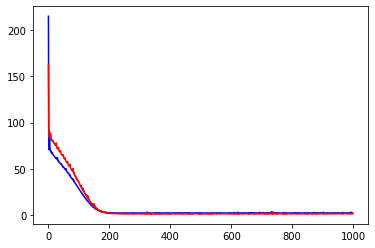

In [133]:
plt.plot( history.history['mse'],'b', history.history['val_mse'],'r')

Training and Testing

In [134]:
model.fit(x_train,y_train, epochs=160,verbose=False)

In [135]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 1.9825 - mse: 1.9825


[1.9825211763381958, 1.9825211763381958]

In [136]:
model.predict([[245,24,32]])

1/1 [==============================] - 0s 22ms/step


array([[87.470535]], dtype=float32)